## 3D Surface Plots

3D surface plots can be created with Matplotlib.

The ```axes3d``` submodule included in Matplotlib's ```mpl_toolkits.mplot3d``` toolkit provides the methods necessary to create 3D surface plots with Python.

### Surface Plots

Surface plots are created with Matplotlib's ```ax.plot_surface()``` method. By default, surface plots are a single color. The general format of Matplotlib's ```ax.plot_surface()``` method is below.

```python
ax.plot_surface(X, Y, Z)
```

Where ```X``` and ```Y``` are 2D array of x and y points and ```Z``` is a 2D array of heights.

An example of a 3D surface plot is in the next code section. Note how the keyword argument ``` projection='3d'``` is included in the ```fig.add_subplot()``` method. 

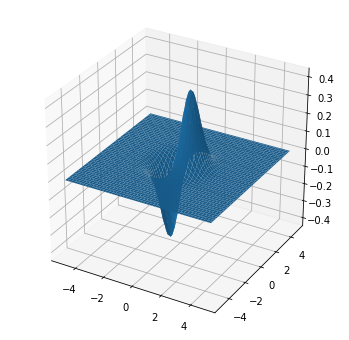

In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
#if using a Jupyter notebook, include:
%matplotlib inline

x = np.arange(-5,5,0.1)
y = np.arange(-5,5,0.1)
X,Y = np.meshgrid(x,y)
Z = X*np.exp(-X**2 - Y**2)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

# Plot a 3D surface
ax.plot_surface(X, Y, Z)

plt.show()

### Wire Frame Plots

Wire frame plots are similar to surface plots, but on a wire frame plot the entire 3d surface is not shown. Instead, the surface is approximated with "wires" laid over the 3D surface. Wire frame 3D surface plots can be constructed using Matplotlib's ```ax.plot_wireframe()``` method. The general method is below.

```python
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
```

Where ```X``` and ```Y``` are 2D array of x and y points and ```Z``` is a 2D array of heights. The keyword arguments ```rstride= ``` and ```cstride= ``` determine the row step size and the column step size. These keyword arguments control how close together the "wires" in the wire frame plot are drawn.

The next code section draws two wire frame plots side by side.

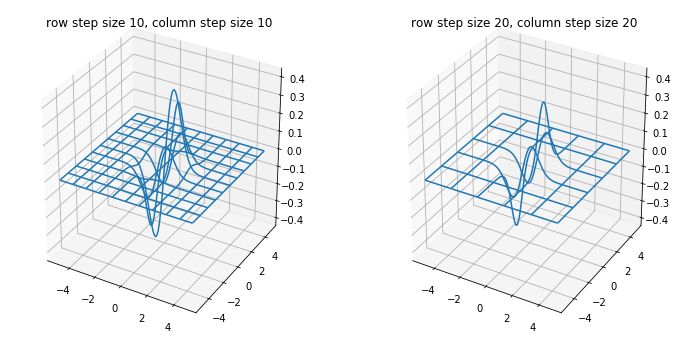

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
# if using a Jupyter notebook, include:
%matplotlib inline

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

x = np.arange(-5,5,0.1)
y = np.arange(-5,5,0.1)
X,Y = np.meshgrid(x,y)
Z = X*np.exp(-X**2 - Y**2)

# Plot a basic wireframe
ax1.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
ax1.set_title('row step size 10, column step size 10')

ax2.plot_wireframe(X, Y, Z, rstride=20, cstride=20)
ax2.set_title('row step size 20, column step size 20')

plt.show()

### Gradient Surface Plots

Gradient surface plots combine a 3D surface plot with a 2D contour plot. In a gradient surface plot, the 3D surface is colored like a 2D contour plot. High parts of the surface contain a different color than low parts of the surface. The general method call is below. Note the ```cmap= ``` keyword argument.

```python
surf = ax.plot_surface(X, Y, Z, 
                        cmap=<color map>,
                        linewidth=0,
                        antialiased=False)
```

The keyword argument ```cmap=<color map>``` assigns the colors to the surface. There is a wide array of color map options in Matplotlib. Options include ```'coolwarm'```, ```'gist_earth'```, and ```'ocean'```. Find all of Matplotlib's colormaps in the Matplotlib documentation at [matplotlib.org/tutorials/colors/colormaps](https://matplotlib.org/tutorials/colors/colormaps.html). A color bar can be added along side the plot by calling the ```fig.colorbar()``` method and passing in the surface plot object.

The next code section builds a gradient surface plot using the ```'gist_earth'``` color map. 

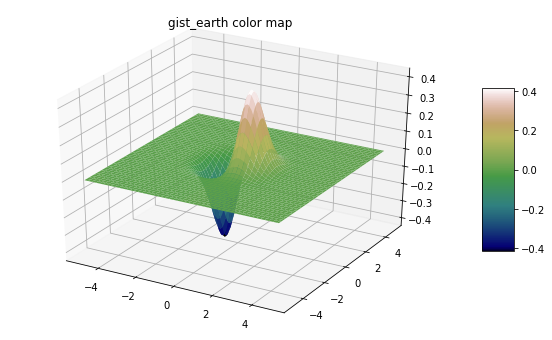

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
# if using a Jupyter notebook, include:
%matplotlib inline

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111, projection='3d')

x = np.arange(-5,5,0.1)
y = np.arange(-5,5,0.1)
X,Y = np.meshgrid(x,y)
Z = X*np.exp(-X**2 - Y**2)

mycmap = plt.get_cmap('gist_earth')
ax1.set_title('gist_earth color map')
surf1 = ax1.plot_surface(X, Y, Z, cmap=mycmap)
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

plt.show()

### 3D Surface Plots with 2D Contour Plot Projections

3D Surface plots created with Matplotlib can be projected onto 2D surfaces. Below is a code section that creates a 3D surface plot. The projections of the 3D surface are visualized on 2D contour plots.

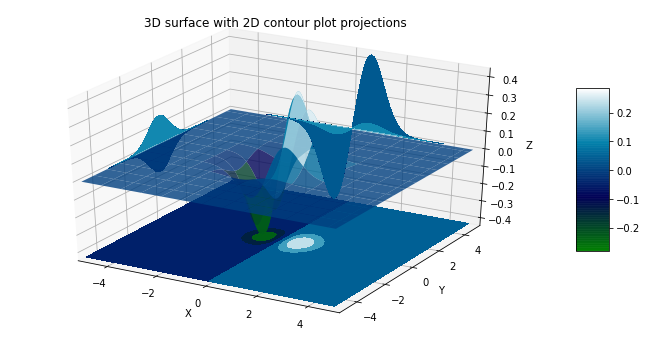

In [4]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

x = np.arange(-5,5,0.1)
y = np.arange(-5,5,0.1)
X,Y = np.meshgrid(x,y)
Z = X*np.exp(-X**2 - Y**2)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.8, cmap=cm.ocean)
cset = ax.contourf(X, Y, Z, zdir='z', offset=np.min(Z), cmap=cm.ocean)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-5, cmap=cm.ocean)
cset = ax.contourf(X, Y, Z, zdir='y', offset=5, cmap=cm.ocean)

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

ax.set_xlabel('X')
ax.set_xlim(-5, 5)
ax.set_ylabel('Y')
ax.set_ylim(-5, 5)
ax.set_zlabel('Z')
ax.set_zlim(np.min(Z), np.max(Z))
ax.set_title('3D surface with 2D contour plot projections')

plt.show()
